In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_colwidth', 1000)

In [3]:
sns.color_palette("hls", 8)

[(0.86, 0.3712, 0.33999999999999997),
 (0.86, 0.7612000000000001, 0.33999999999999997),
 (0.5688000000000001, 0.86, 0.33999999999999997),
 (0.33999999999999997, 0.86, 0.5012000000000001),
 (0.33999999999999997, 0.8287999999999999, 0.86),
 (0.33999999999999997, 0.43879999999999986, 0.86),
 (0.6311999999999998, 0.33999999999999997, 0.86),
 (0.86, 0.33999999999999997, 0.6987999999999996)]

In [4]:
data = pd.read_csv('./cleaned_data.csv')

In [ ]:
data.head()

In [6]:
data.shape

(19042, 31)

In [7]:
data.columns

Index(['Unnamed: 0', 'code', 'url', 'creator', 'created_t', 'created_datetime',
       'last_modified_t', 'last_modified_datetime', 'product_name', 'brands',
       'brands_tags', 'countries', 'countries_tags', 'countries_fr',
       'ingredients_text', 'additives_n', 'additives',
       'ingredients_that_may_be_from_palm_oil_n', 'nutrition_grade_fr',
       'states', 'states_tags', 'states_fr', 'energy_100g', 'fat_100g',
       'saturated-fat_100g', 'carbohydrates_100g', 'sugars_100g',
       'proteins_100g', 'salt_100g', 'sodium_100g', 'nutrition-score-fr_100g'],
      dtype='object')

In [8]:
data.drop('Unnamed: 0', axis=1, inplace=True)

### Valeurs nulles

In [9]:
data.isna().sum()

code                                        0
url                                         0
creator                                     0
created_t                                   0
created_datetime                            0
last_modified_t                             0
last_modified_datetime                      0
product_name                               11
brands                                     25
brands_tags                                26
countries                                   0
countries_tags                              0
countries_fr                                0
ingredients_text                            0
additives_n                                 0
additives                                   5
ingredients_that_may_be_from_palm_oil_n     0
nutrition_grade_fr                          0
states                                      0
states_tags                                 0
states_fr                                   0
energy_100g                       

### Types des features

In [10]:
data.dtypes

code                                         int64
url                                         object
creator                                     object
created_t                                   object
created_datetime                            object
last_modified_t                              int64
last_modified_datetime                      object
product_name                                object
brands                                      object
brands_tags                                 object
countries                                   object
countries_tags                              object
countries_fr                                object
ingredients_text                            object
additives_n                                float64
additives                                   object
ingredients_that_may_be_from_palm_oil_n       bool
nutrition_grade_fr                          object
states                                      object
states_tags                    

In [6]:
data['ingredients_that_may_be_from_palm_oil_n'] = data['ingredients_that_may_be_from_palm_oil_n'].astype('bool')
data['nutrition_grade_fr'] = data['nutrition_grade_fr'].astype('category')

## Analyse univariée

### Distribution

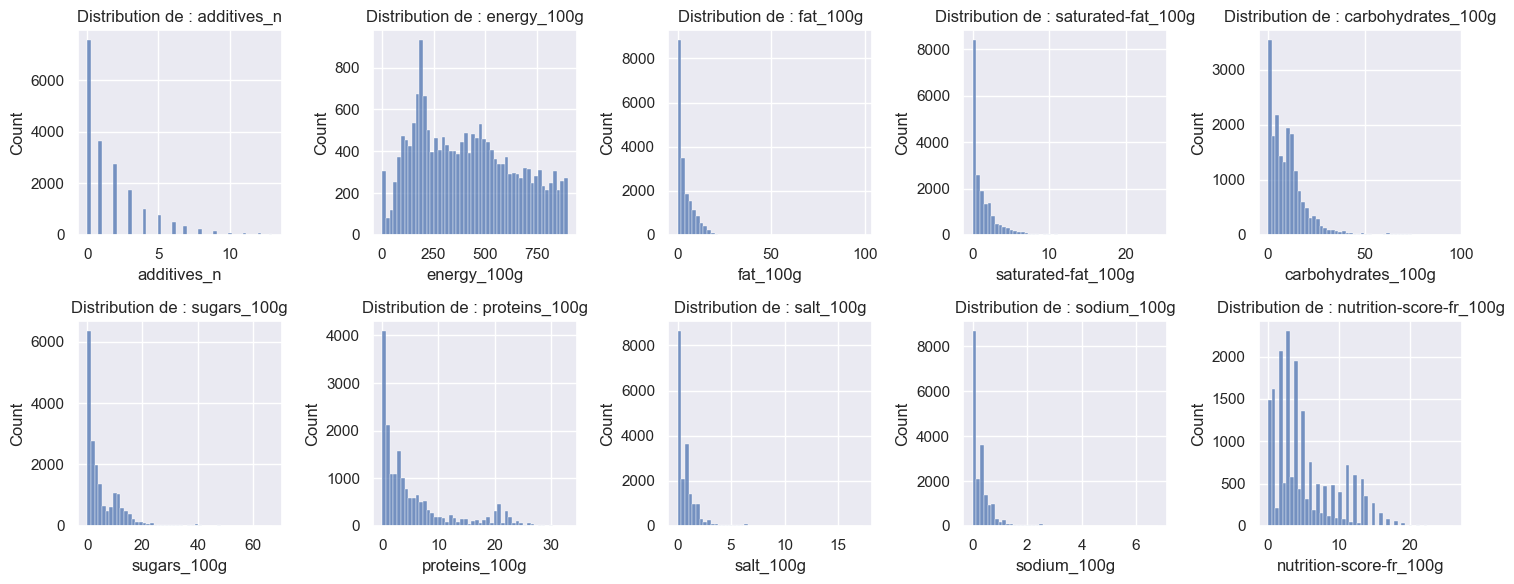

In [31]:
numeric_columns = data.select_dtypes(include=['int32', 'float64']).columns

fig, axes = plt.subplots(2, 5, figsize=(15, 6))
axes = axes.flatten()  # Aplatir la grille pour itérer facilement

for i, column in enumerate(numeric_columns):
    sns.set(font_scale=1)
    sns.histplot(data[column], bins=50, ax=axes[i])  # Utiliser histplot au lieu de distplot (déprécié)
    axes[i].set_title(f'Distribution de : {column}')
    axes[i].set_xlabel(column)

for j in range(i + 1, 10):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.savefig('images/distribs.png',  bbox_inches='tight')



### 2 types de features :
#### Features continues:
- energy_100g
- fat_100g
- saturated-fat_100g
- carbohydrates_100g
- sugars_100g
- proteins_100g
- salt_100g
- sodium_100g
#### Features discrètes:
- additives_n
- nutrition-score_100g

### Box plots


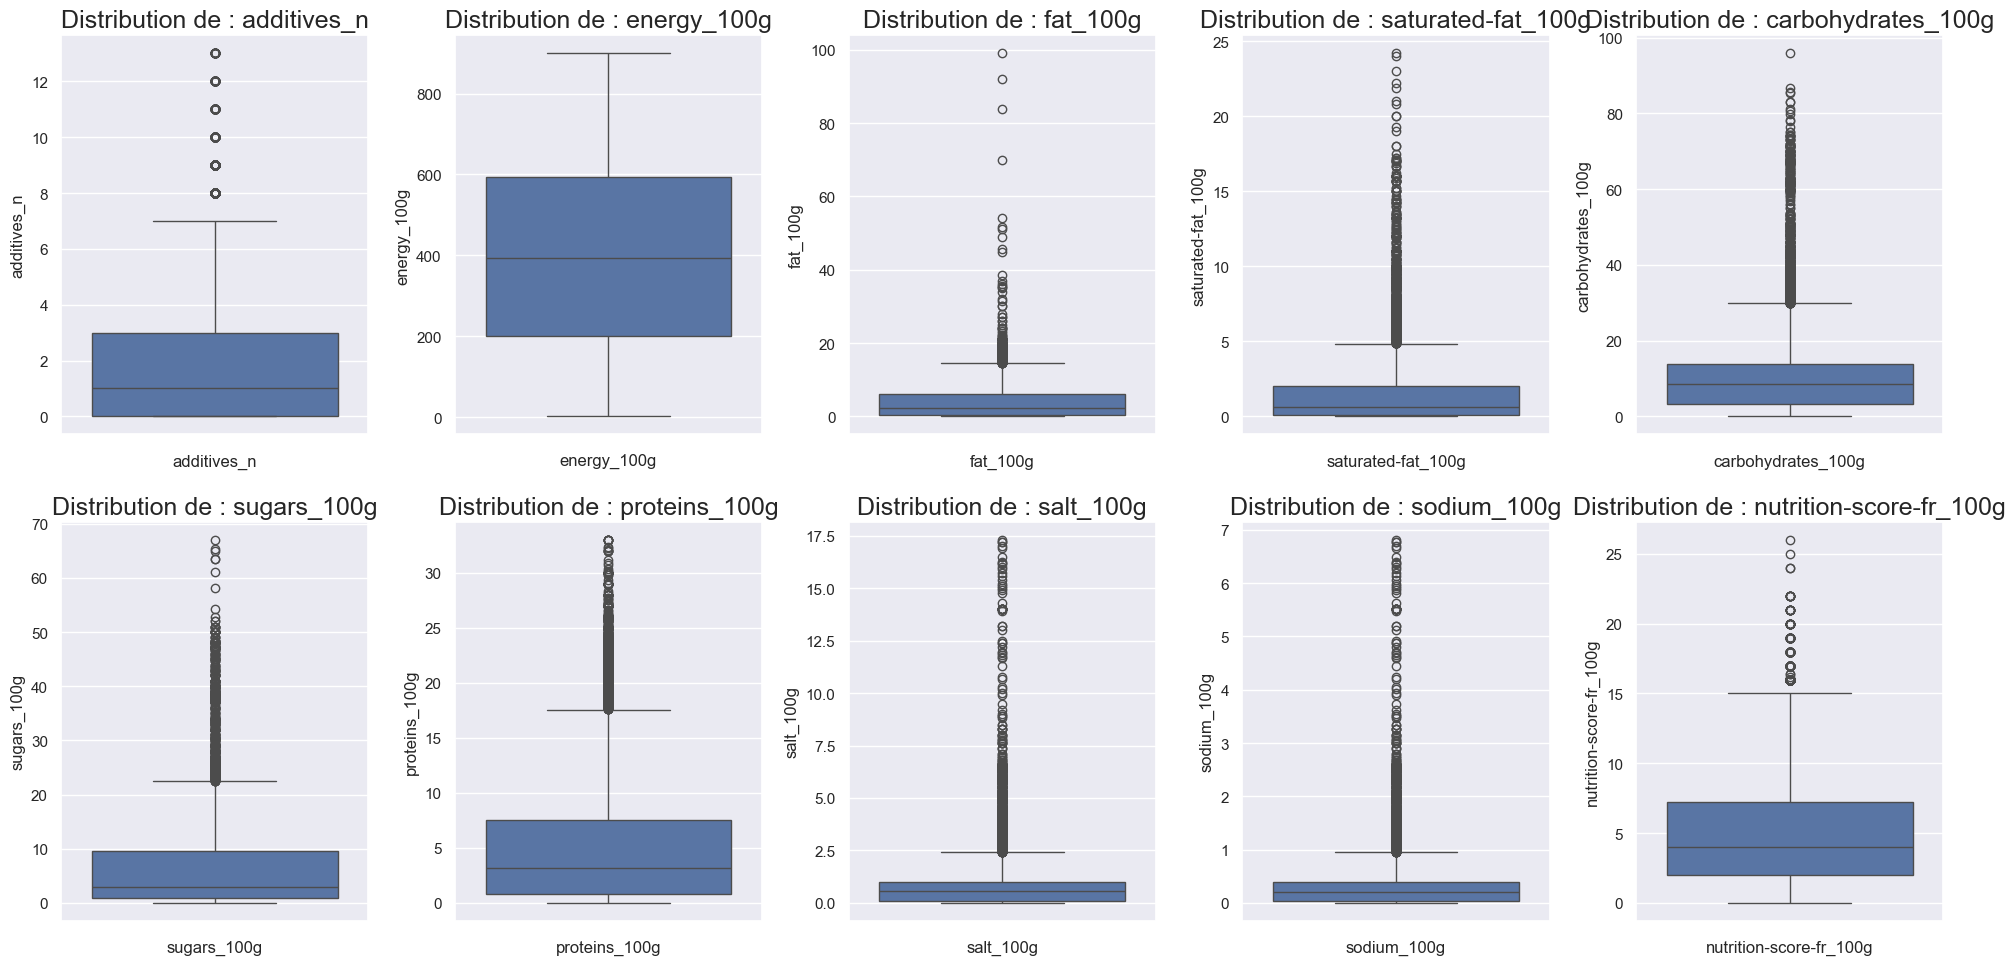

In [21]:
numeric_columns = data.select_dtypes(include=['int32', 'float64']).columns

fig, axes = plt.subplots(2, 5, figsize=(20, 10))
axes = axes.flatten()  

sns.set(font_scale=1.5)

for i, column in enumerate(numeric_columns):
    sns.boxplot(y=data[column], ax=axes[i]) 
    axes[i].set_title(f'Distribution de : {column}')
    axes[i].set_xlabel(column)

for j in range(i + 1, 10):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.savefig('images/boxes.png',  bbox_inches='tight')


### Bar plots pour valeurs catégoriques

In [5]:
categories_columns = ['ingredients_that_may_be_from_palm_oil_n', 'nutrition_grade_fr']

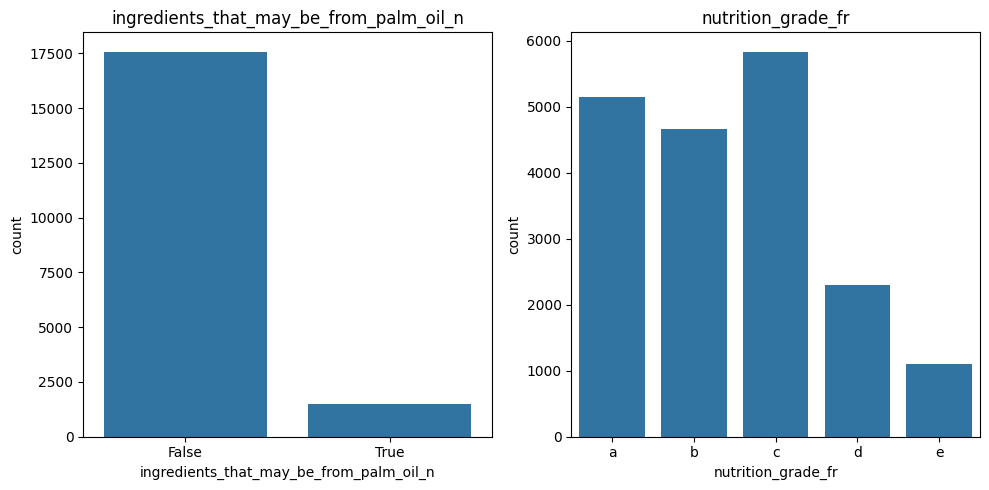

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))  # Ajuster la taille selon besoin


for ax, column in zip(axes, categories_columns):
    sns.countplot(x=data[column], data=data, ax=ax)
    ax.set_title(column)

plt.tight_layout()
plt.savefig('images/bar_plots_categorielle.png',  bbox_inches='tight')


Les autres colonnes sont remplies de texte, on peut chercher à savoir si certains termes reviennent

In [18]:
object_columns = ['code',
                 'url',
                 'creator',
                 'product_name',
                  'brands',
                  'countries_fr',
                  'additives',
                  'ingredients_text',
                  'nutrition_grade_fr',
                  'states_fr']

In [ ]:
import collections
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

mots_populaires = []
for colonne in object_columns:
    liste_mots = [str(i).split(' ', 1)[0] for i in data[colonne].dropna().tolist()]
    mots_populaires.append(collections.Counter(liste_mots).most_common(20))

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 10))
axes = axes.flatten()

sns.set(font_scale=1.2, style="whitegrid")
for i in range(6):
    if i >= len(object_columns):
        fig.delaxes(axes[i])
        continue
    
    nom_colonne = object_columns[i]
    liste_mots = mots_populaires[i]
    
    df_mots_utilises = pd.DataFrame(liste_mots, columns=['Mot', 'Occurences']) \
                       .sort_values(by='Occurences', ascending=False)
    
    df_mots_utilises['Mot_tronqué'] = df_mots_utilises['Mot'].apply(
        lambda x: x if len(x) <= 12 else x[:12] + "..."
    )
    
    sns.barplot(
        y='Mot_tronqué',
        x='Occurences',
        data=df_mots_utilises,
        palette="viridis",
        ax=axes[i],
        width=0.6
    )
    axes[i].set_title(f'20 mots les plus fréquents\n({nom_colonne})', fontsize=14)
    axes[i].set_ylabel("")
    axes[i].tick_params(axis='y', labelsize=10)

plt.tight_layout()
plt.savefig('images/word_occurences.png', bbox_inches='tight')
sns.set(font_scale=1)


### Analyse bivariée

In [49]:
data.columns

Index(['code', 'url', 'creator', 'created_t', 'created_datetime',
       'last_modified_t', 'last_modified_datetime', 'product_name', 'brands',
       'brands_tags', 'countries', 'countries_tags', 'countries_fr',
       'ingredients_text', 'additives_n', 'additives',
       'ingredients_that_may_be_from_palm_oil_n', 'nutrition_grade_fr',
       'states', 'states_tags', 'states_fr', 'energy_100g', 'fat_100g',
       'saturated-fat_100g', 'carbohydrates_100g', 'sugars_100g',
       'proteins_100g', 'salt_100g', 'sodium_100g', 'nutrition-score-fr_100g'],
      dtype='object')

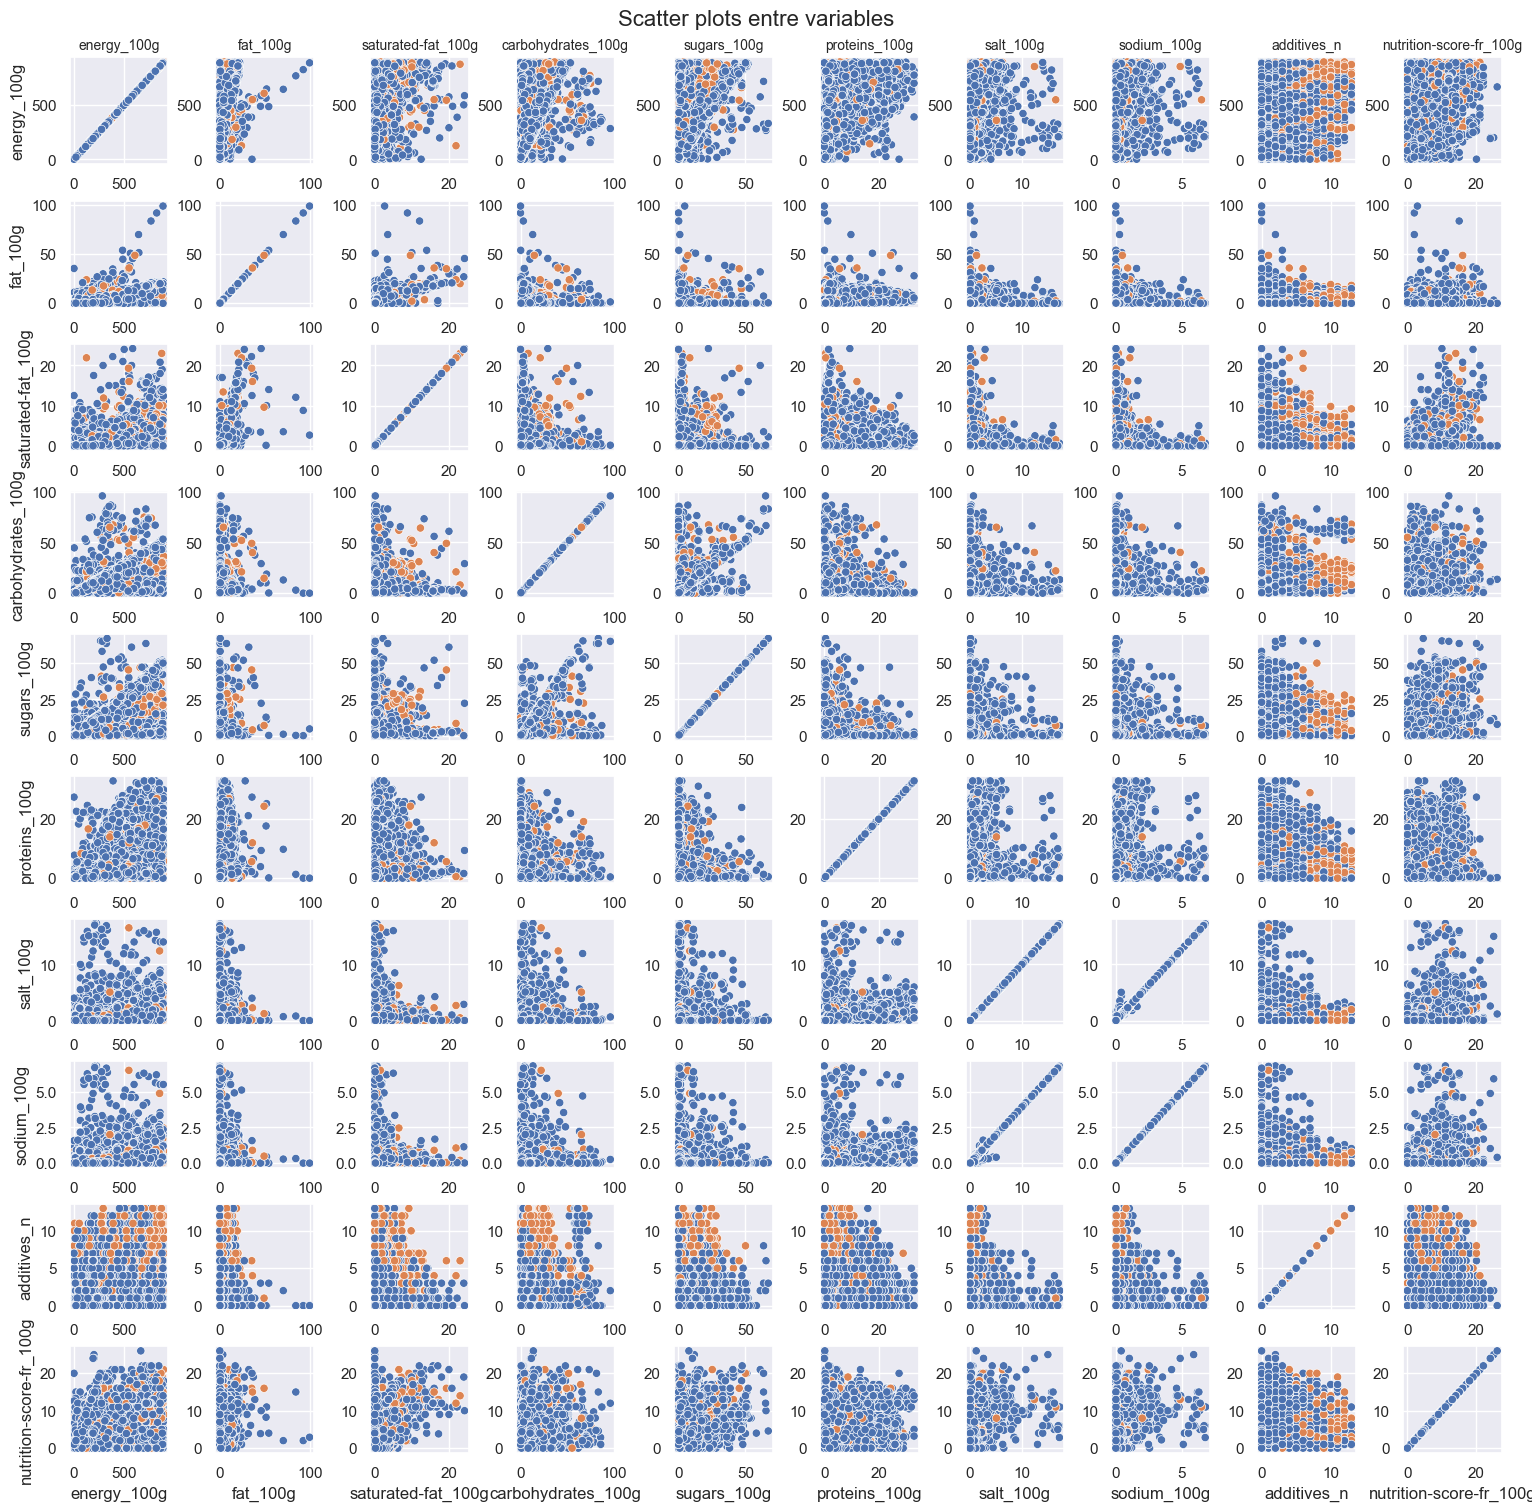

In [29]:
vars = [
    'energy_100g', 'fat_100g', 'saturated-fat_100g', 'carbohydrates_100g',
    'sugars_100g', 'proteins_100g', 'salt_100g', 'sodium_100g', 
    'additives_n', 'nutrition-score-fr_100g'
]
n_vars = len(vars)

fig, axes = plt.subplots(n_vars, n_vars, figsize=(15, 15), constrained_layout=True)

for i in range(n_vars):
    for j in range(n_vars):
        ax = axes[i, j]
        sns.scatterplot(
            data=data,
            x=vars[j],
            y=vars[i],
            hue="ingredients_that_may_be_from_palm_oil_n",
            ax=ax,
            legend=False 
        )
        if i < n_vars - 1:
            ax.set_xlabel("")
        if j > 0:
            ax.set_ylabel("")
            
for ax, col in zip(axes[0], vars):
    ax.set_title(col, fontsize=10)

plt.suptitle("Scatter plots entre variables", fontsize=16)
plt.savefig('images/scatters_matrix.png',  bbox_inches='tight')


In [48]:
# Analyse bivariée
# graphiques de dispersion
# exemple sucre vs autre, puis les colorer en fonction de ingredients_that_may_be_from_palm_oil_n
# Matrice de correlation
# Test de chi ? pour les variables qualitatives

# Analyse multivariee ANOVA + ACP\
# Finalement montrer l'interet des nouvelles features afin de predire ma cible

Calculez les statistiques descriptives pour obtenir des informations supplémentaires sur la tendance centrale, la dispersion et la forme des distributions.:
- Exemple est-ce que les variables suivent une loi normale. 
- Oui ou non une var suit une loi normale, faire la fonction qui permet de le savoir

In [32]:
stats = data.describe(include='all')
stats_extra = data[numeric_columns].agg(['mean', 'std', 'skew', 'kurtosis'])


In [33]:
stats_extra

,additives_n,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g
mean,1.791645,412.518963,3.847811,1.386595,10.273928,5.764333,5.777435,0.798958,0.313105,5.160046
std,2.294941,236.163242,4.612705,2.048614,10.044438,7.265970,6.770555,1.215570,0.478068,4.239644
skew,1.776258,0.300534,2.835103,3.200467,2.384330,2.551682,1.497686,5.086778,5.106569,1.044727
kurtosis,3.479100,-0.977531,28.070013,16.159226,9.321812,9.443425,1.246896,44.306770,44.554839,0.372412


In [9]:
from scipy.stats import shapiro

def is_normal(data, alpha=0.05):
    data = data.dropna() 
    stat, p_value = shapiro(data)
    return p_value > alpha  

normality_results = {}

for column in data[numeric_columns].columns:
    normality_results[column] = is_normal(data[column])

C:\Users\Rafael\anaconda3\envs\trainer\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 19042.
  res = hypotest_fun_out(*samples, **kwds)


In [37]:
normality_results

{'additives_n': False,
 'energy_100g': False,
 'fat_100g': False,
 'saturated-fat_100g': False,
 'carbohydrates_100g': False,
 'sugars_100g': False,
 'proteins_100g': False,
 'salt_100g': False,
 'sodium_100g': False,
 'nutrition-score-fr_100g': False}

Pas de loi normale suivie par les features

### Matrice de correlation

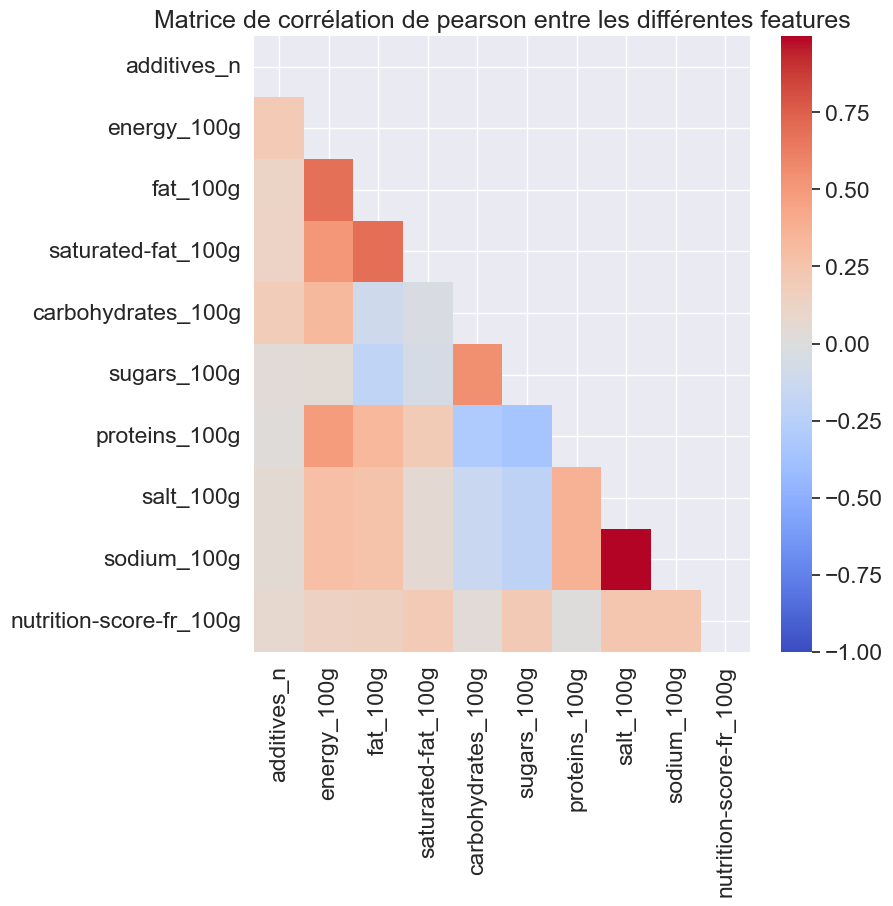

In [30]:
plt.figure(figsize=(8,8))
sns.set(font_scale=1.5)
plt.title('Matrice de corrélation de pearson entre les différentes features')

corr = data[numeric_columns].corr()

mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True 

ax = sns.heatmap(corr, mask=mask, vmin=-1, cmap='coolwarm')
plt.savefig('images/correlation_matrix.png',  bbox_inches='tight')
sns.set(font_scale=1)

### Test de Chi

In [35]:
from scipy.stats import chi2_contingency, chi2
import pandas as pd
import seaborn as sns

def test_chi2(serie1, serie2, alpha=0.03):
    """Teste l'indépendance entre deux variables avec le test du Chi² et retourne un DataFrame."""
    
    # Création de la table de contingence
    tab_contingence = pd.crosstab(serie1, serie2)

    # Calcul du test du Chi²
    stat_chi2, p, dof, expected_table = chi2_contingency(tab_contingence.values)

    # Détermination de la valeur critique
    critical = chi2.ppf(1 - alpha, dof)
    
    # Conclusion du test
    conclusion = "Non Indépendantes (H0 rejetée)" if p <= alpha else "Indépendantes (H0 non rejetée)"
    
    # Retourne un dictionnaire de résultats
    return {
        "Chi²": round(stat_chi2, 5),
        "p-valeur": round(p, 5),
        "DOF": dof,
        "Conclusion": conclusion
    }



In [38]:
x = pd.cut(data['ingredients_that_may_be_from_palm_oil_n'], 2)

results = []

for column in numeric_columns:
    print(f'Test d\'indépendance: nutriscore / {column}')

    # Si trop de modalités, discrétisation
    if data[column].nunique() > 20:
        y = pd.cut(data[column], 20).astype('category')
    else:
        y = data[column].astype('category')
    
    # Exécute le test et stocke les résultats
    result = test_chi2(x, y)
    result["Feature"] = column  # Ajout du nom de la variable
    results.append(result)

# Transformation en DataFrame final
df_results = pd.DataFrame(results).set_index("Feature").T

# Affichage du DataFrame final
df_results

Test d'indépendance: nutriscore / additives_n
Test d'indépendance: nutriscore / energy_100g
Test d'indépendance: nutriscore / fat_100g
Test d'indépendance: nutriscore / saturated-fat_100g
Test d'indépendance: nutriscore / carbohydrates_100g
Test d'indépendance: nutriscore / sugars_100g
Test d'indépendance: nutriscore / proteins_100g
Test d'indépendance: nutriscore / salt_100g
Test d'indépendance: nutriscore / sodium_100g
Test d'indépendance: nutriscore / nutrition-score-fr_100g


Feature,additives_n,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g
Chi²,2165.9132,543.55955,464.86169,477.8709,849.0466,342.1521,491.16408,110.91355,110.7863,55.58671
p-valeur,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00001
DOF,15,19,13,19,19,19,19,19,19,18
Conclusion,Non Indépendantes (H0 rejetée),Non Indépendantes (H0 rejetée),Non Indépendantes (H0 rejetée),Non Indépendantes (H0 rejetée),Non Indépendantes (H0 rejetée),Non Indépendantes (H0 rejetée),Non Indépendantes (H0 rejetée),Non Indépendantes (H0 rejetée),Non Indépendantes (H0 rejetée),Non Indépendantes (H0 rejetée)


'ingredients_that_may_be_from_palm_oil_n' est bien dépendante de nos features numeriques

In [36]:
# retravailler les variable additives et ingredients text 
qualitatives_vars = ['product_name', 'brands',
       'brands_tags', 'countries', 'countries_tags', 'countries_fr', 'additives_n', 'nutrition_grade_fr']

### ANOVA

In [38]:
from scipy.stats import f_oneway

anova_results = {}

# Faire pour les var quantitive
# Test de contingence pour les qualit
# Explicaiton: Ma target est quali et ANOVA fait quali avec quanti test de contingence fait quali quali

for var in data[numeric_columns]:
    stat, p_value = f_oneway(data[var], data['ingredients_that_may_be_from_palm_oil_n'])
    anova_results[var] = p_value  

anova_df = pd.DataFrame(list(anova_results.items()), columns=['Variable', 'p_value'])

anova_df = anova_df.sort_values(by="p_value") 

In [45]:
for pvalue in anova_df['p_value']:
    print(f"p-value : {pvalue:.2e}")


p-value : 0.00e+00
p-value : 0.00e+00
p-value : 0.00e+00
p-value : 0.00e+00
p-value : 0.00e+00
p-value : 0.00e+00
p-value : 0.00e+00
p-value : 0.00e+00
p-value : 0.00e+00
p-value : 0.00e+00


In [46]:
group_palmoil_true_energy.mean()

NameError: name 'group_palmoil_true_energy' is not defined

In [58]:
group_palmoil_false_energy.mean()

402.12737662854863

## PCA

In [47]:
data[numeric_columns].columns

Index(['additives_n', 'energy_100g', 'fat_100g', 'saturated-fat_100g',
       'carbohydrates_100g', 'sugars_100g', 'proteins_100g', 'salt_100g',
       'sodium_100g', 'nutrition-score-fr_100g'],
      dtype='object')

In [54]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[numeric_columns])

pca = PCA(n_components=2)
principal_components = pca.fit_transform(data_scaled)

print("Variance expliquée après normalisation :", pca.explained_variance_)


Variance expliquée après normalisation : [3.16058575 1.97158242]


### Scatter plot des PCA

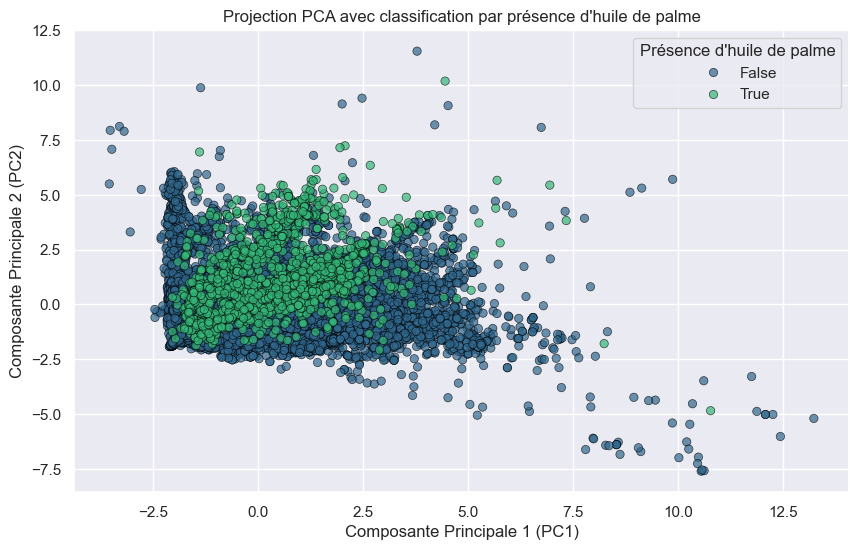

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

fig = plt.figure(figsize=(10, 6))

# Trier les données pour que les True soient tracés après les False
data_sorted = data.sort_values(by="ingredients_that_may_be_from_palm_oil_n", ascending=True)

sns.scatterplot(
    data=data_sorted, 
    x="PC1", 
    y="PC2", 
    hue="ingredients_that_may_be_from_palm_oil_n",
    palette="viridis",
    alpha=0.7,
    edgecolor="black",
    linewidth=0.5
)

plt.xlabel("Composante Principale 1 (PC1)")
plt.ylabel("Composante Principale 2 (PC2)")
plt.title("Projection PCA avec classification par présence d'huile de palme")
plt.legend(title="Présence d'huile de palme")
plt.savefig('images/pca_2d.png', bbox_inches='tight')
plt.show()


### Cercle de corrélations

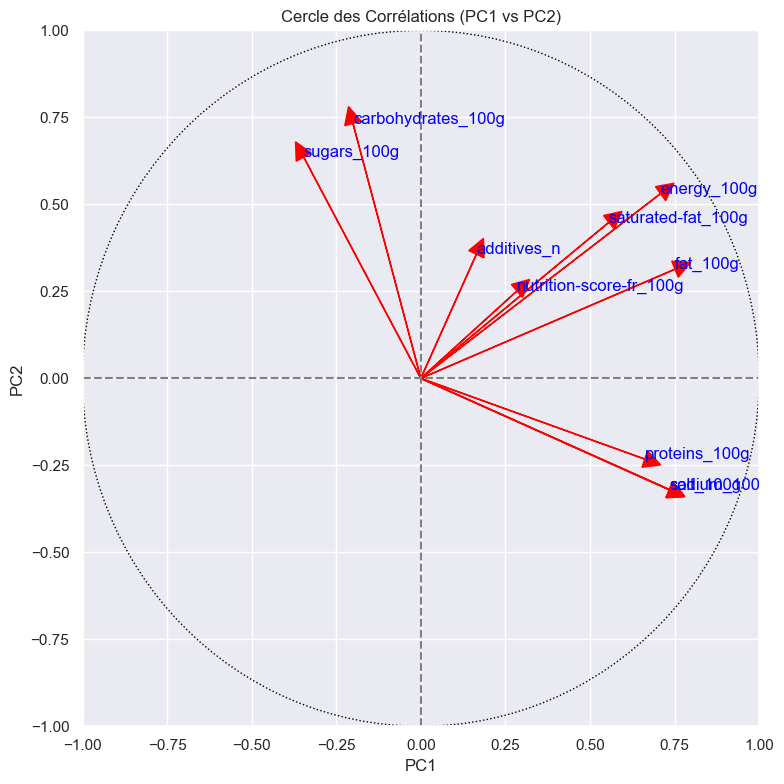

In [56]:
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
feature_coords = pd.DataFrame(loadings, index=numeric_columns, columns=['PC1', 'PC2'])
fig, ax = plt.subplots(figsize=(8, 8))
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
circle = plt.Circle((0, 0), 1, color='black', fill=False, linestyle='dotted')
ax.add_patch(circle)
for i, feature in enumerate(numeric_columns):
    x = feature_coords["PC1"].iloc[i]
    y = feature_coords["PC2"].iloc[i]
    ax.arrow(0, 0, x, y, head_width=0.05, head_length=0.05, fc='red', ec='red', clip_on=True)
    ax.text(x, y, feature, fontsize=12, color='blue', clip_on=True)
ax.axhline(0, color='grey', linestyle='--')
ax.axvline(0, color='grey', linestyle='--')
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_title("Cercle des Corrélations (PC1 vs PC2)")
ax.grid(True)
plt.tight_layout()
plt.savefig('images/pca_projections.png', bbox_inches='tight')
plt.show()


# Conclusions

### Conclusion
L’objectif principal est de faciliter la saisie et l’auto-complétion des données afin de réduire les erreurs et les valeurs manquantes dans la base Open Food Facts. L’Analyse en Composantes Principales (PCA) a été utilisée pour explorer la structure des données et réduire leur dimensionnalité tout en conservant l’essentiel de l’information.

1. Faisabilité de la prédiction sur notre target
Nos différentes analyses univariées et bivariées montrent qu’il existe des corrélations notables entre certaines variables nutritionnelles et la présence d’ingrédients pouvant contenir de l’huile de palme. Ces relations suggèrent qu’il est possible d’entraîner un modèle de prédiction pour anticiper cette information à partir des autres caractéristiques des produits.

Le cercle des corrélations du PCA révèle que des variables comme l’énergie, les matières grasses et les acides gras saturés sont fortement liées et redondantes, tandis que d’autres, comme le sodium et les protéines, apportent une information complémentaire. Cette structure permet d’identifier des patterns exploitables pour la prédiction.

2. Utilisation des variables PCA pour prédire notre feature
L’application du PCA nous a permis de réduire le nombre de dimensions tout en capturant les relations essentielles entre les variables. Les nouvelles composantes principales (PC1 et PC2) synthétisent ces informations et peuvent être utilisées comme entrées dans un modèle de prédiction.

Cette transformation a plusieurs avantages :

Réduction de la complexité : Moins de variables à traiter tout en conservant la variance importante.
Optimisation des calculs : Un modèle plus rapide et plus efficace.
Amélioration de la qualité des suggestions : En utilisant ces composantes, on peut proposer des valeurs cohérentes pour compléter automatiquement les données manquantes.

### Limites
Corrélations limitées avec la target
Bien que le PCA montre que certaines variables sont bien représentées dans les nouvelles composantes, cela ne garantit pas une bonne prédiction. La corrélation entre les features et la target reste limitée, et des améliorations sur la qualité des données pourraient être nécessaires pour obtenir de meilleurs résultats.

Taille et diversité du dataset
L’analyse a été réalisée sur un ensemble de données restreint, ce qui limite la capacité du modèle à généraliser sur l’ensemble de la base Open Food Facts. Une approche plus large et diversifiée serait nécessaire pour assurer la robustesse de l’auto-complétion sur tous les types de produits.

Conclusion générale
Les résultats obtenus montrent que la mise en place d’un système de suggestion basé sur le PCA est réalisable. Les nouvelles composantes principales offrent un moyen efficace de réduire la dimensionnalité des données tout en conservant leur structure essentielle. Cependant, pour garantir une bonne prédiction, il serait pertinent d’explorer d’autres méthodes de transformation et d’enrichissement des données afin d’améliorer la pertinence des suggestions d’auto-complétion.